In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
file_path = 'output.xlsx'  # Update this with the correct path if necessary
df_react_length = pd.read_excel(file_path, sheet_name='q_react_length')
df_react_length.dropna(axis=1, how='all', inplace=True)
df_react_length.head()


,time[minutes],queue_preparation_length scenario 0,time[minutes].1,queue_preparation_length scenario 1,time[minutes].2,queue_preparation_length scenario 2,time[minutes].3,queue_preparation_length scenario 3,time[minutes].4,queue_preparation_length scenario 4,...,time[minutes].55,queue_preparation_length scenario 55,time[minutes].56,queue_preparation_length scenario 56,time[minutes].57,queue_preparation_length scenario 57,time[minutes].58,queue_preparation_length scenario 58,time[minutes].59,queue_preparation_length scenario 59
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,2,0,2,0,2,0,2,0,2,0,...,2,0,2,0,2,0,2,0,2,0
3,3,0,3,0,3,0,3,0,3,0,...,3,0,3,0,3,0,3,0,3,0
4,4,0,4,0,4,0,4,0,4,0,...,4,0,4,0,4,0,4,0,4,0


In [14]:
df_results = pd.read_excel(file_path, sheet_name='results')
df_results.head()

,scenario,scenario_name,replication_nr,random_seed,animate,run_duration,rate_multiplier,n_batches_product1,n_batches_product2,n_batches_distillation,...,queue_reaction_length,n_batches_created_product_1,finished_batchesproduct_1,unfinished_batchesproduct_1,n_batches_created_product_2,finished_batchesproduct_2,unfinished_batchesproduct_2,time_in_system_max,time_in_system_mean,df_log_batches_entered
0,1,1,0,0,False,1440,0.5,5,3,3,...,"[(0.0, 0), (1.0, 0), (2.0, 0), (3.0, 0), (4.0,...",29,18,11,28,13,15,739.080623,490.172444,"[{'type': 'product_1', 't_entered_system': 103..."
1,1,1,1,1,False,1440,0.5,5,3,3,...,"[(0.0, 0), (1.0, 0), (2.0, 0), (3.0, 0), (4.0,...",34,17,17,31,12,19,967.247530,534.887775,"[{'type': 'product_1', 't_entered_system': 76...."
2,1,1,2,2,False,1440,0.5,5,3,3,...,"[(0.0, 0), (1.0, 0), (2.0, 0), (3.0, 0), (4.0,...",20,9,11,28,12,16,777.214868,453.392353,"[{'type': 'product_1', 't_entered_system': 213..."
3,1,1,3,3,False,1440,0.5,5,3,3,...,"[(0.0, 0), (1.0, 0), (2.0, 0), (3.0, 0), (4.0,...",36,15,21,32,14,18,686.681318,431.800226,"[{'type': 'product_1', 't_entered_system': 35...."
4,1,1,4,4,False,1440,0.5,5,3,3,...,"[(0.0, 0), (1.0, 0), (2.0, 0), (3.0, 0), (4.0,...",29,18,11,22,12,10,816.718036,525.447893,"[{'type': 'product_1', 't_entered_system': 21...."


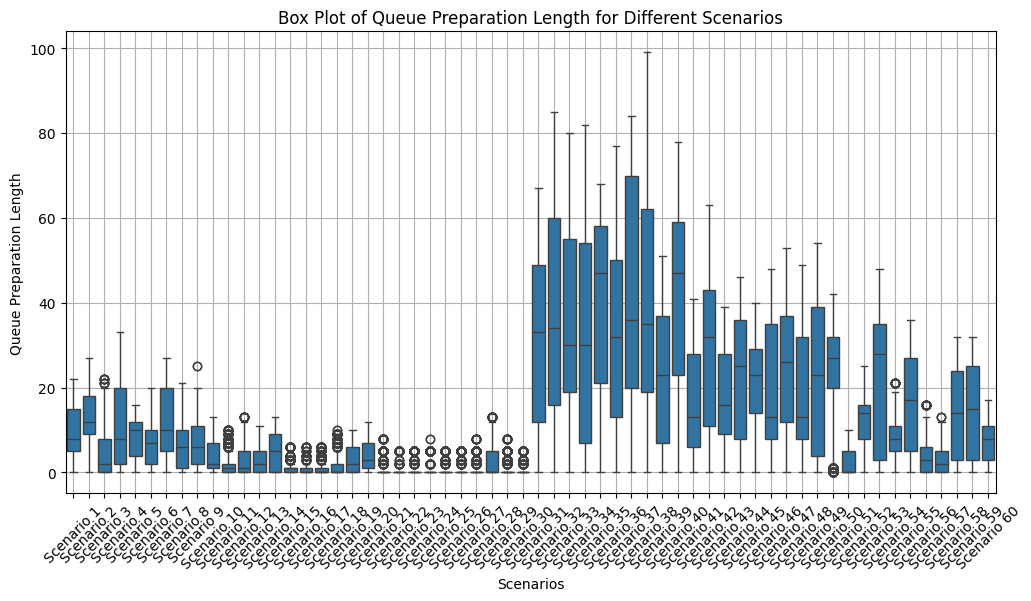

In [12]:
# Initialize an empty DataFrame for reshaping
queue_data = pd.DataFrame()

# Loop through the DataFrame to extract queue lengths and scenario numbers
for i in range(1, len(df.columns), 3):  # Start from 1 to skip the time columns
    if i < len(df.columns):  # Check if the queue length column exists
        scenario_num = (i - 1) // 3  # Determine the scenario based on the current index
        # Create a DataFrame for the current scenario's queue lengths
        temp_df = pd.DataFrame({
            'Queue Length': pd.to_numeric(df[i], errors='coerce'),  # Convert to numeric
            'Scenario': f'Scenario {scenario_num + 1}'  # +1 to adjust for 0-indexing
        })
        # Append the temporary DataFrame to the main DataFrame
        queue_data = pd.concat([queue_data, temp_df], ignore_index=True)

# Drop rows with NaN values in the 'Queue Length' column
queue_data.dropna(subset=['Queue Length'], inplace=True)

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Scenario', y='Queue Length', data=queue_data)
plt.title('Box Plot of Queue Preparation Length for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Queue Preparation Length')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

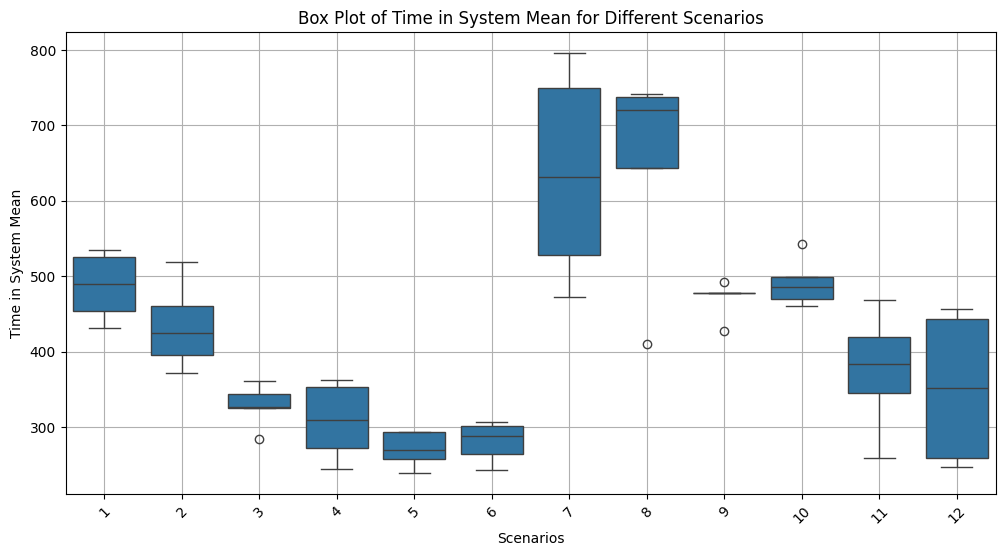

In [15]:
# Create the box plot for time_in_system_mean per Scenario
plt.figure(figsize=(12, 6))

# Use the boxplot function from seaborn
sns.boxplot(x='scenario', y='time_in_system_mean', data=df_results)

# Title and labels
plt.title('Box Plot of Time in System Mean for Different Scenarios')
plt.xlabel('Scenarios')
plt.ylabel('Time in System Mean')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

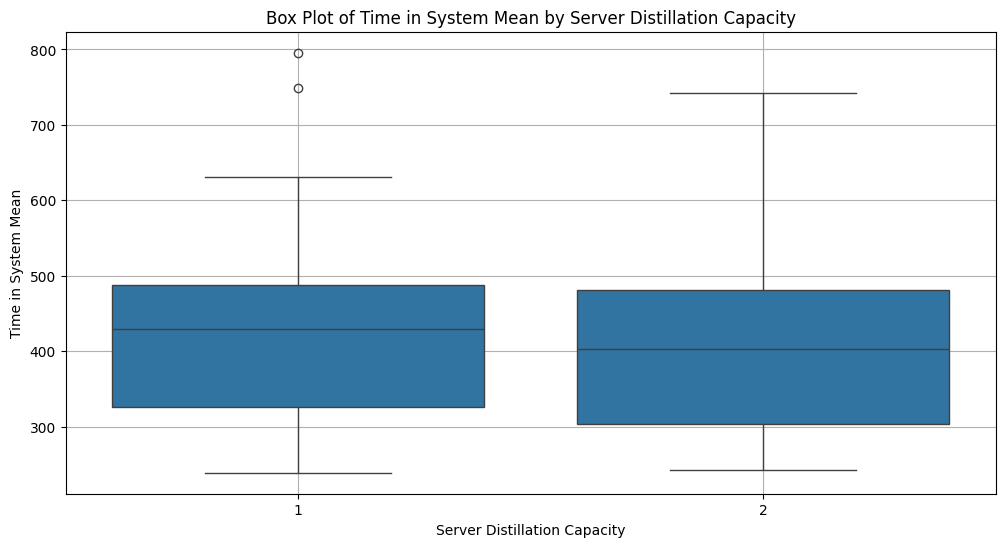

In [16]:
# Create box plots for the time_in_system_mean by server_distillation_capacity
plt.figure(figsize=(12, 6))
sns.boxplot(x='server_distillation_capacity', y='time_in_system_mean', data=df_results)
plt.title('Box Plot of Time in System Mean by Server Distillation Capacity')
plt.xlabel('Server Distillation Capacity')
plt.ylabel('Time in System Mean')
plt.grid()
plt.show()


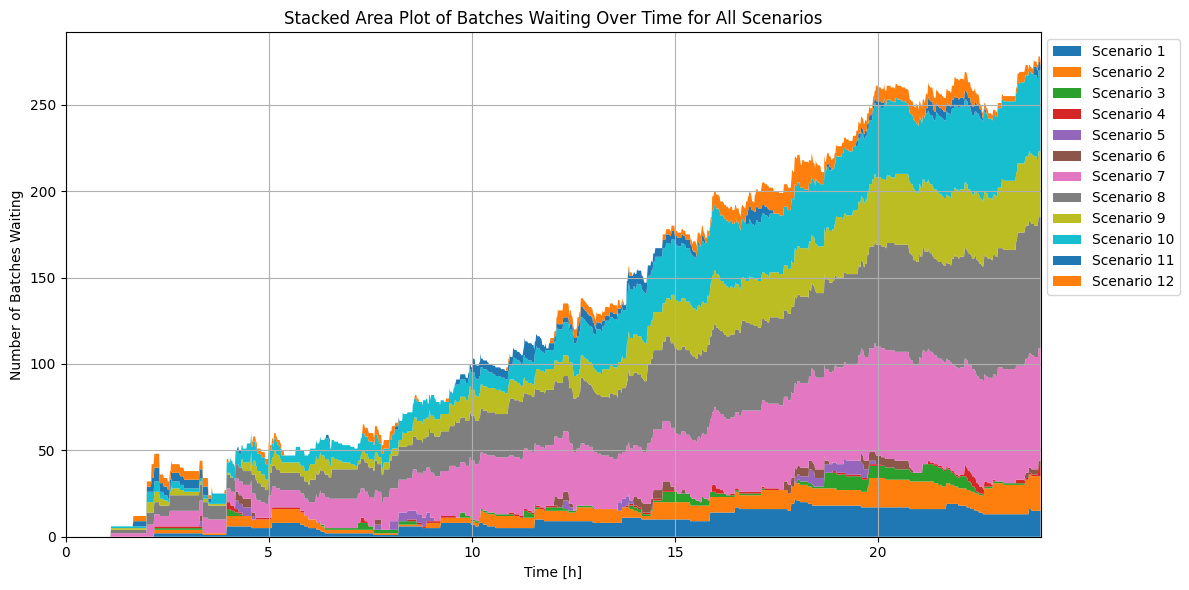

In [20]:
# Create a new DataFrame for the stacked area plot
# Initialize an empty DataFrame to hold waiting batches for each scenario
waiting_batches = pd.DataFrame()

# Assuming the time is in the first column and scenarios are structured as described
for scenario in range(12):  # For 12 scenarios
    # Extract the waiting batches for each scenario
    batches_column = f'queue_preparation_length scenario {scenario * 5}'
    waiting_batches[scenario] = df_react_length[batches_column]  # Adjust if column names differ

# Convert time to hours if the first column contains time in minutes
time_hours = df_react_length.iloc[:, 0] / 60  # Convert time from minutes to hours

# Add time as the first column in waiting_batches
waiting_batches.insert(0, 'Time [h]', time_hours)

# Step 3: Create the Stacked Area Plot
plt.figure(figsize=(12, 6))
plt.stackplot(waiting_batches['Time [h]'], waiting_batches.iloc[:, 1:].T, labels=[f'Scenario {i+1}' for i in range(12)])
plt.title('Stacked Area Plot of Batches Waiting Over Time for All Scenarios')
plt.xlabel('Time [h]')
plt.xlim(0, 24)
plt.ylabel('Number of Batches Waiting')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout()

# Show the plot
plt.show()

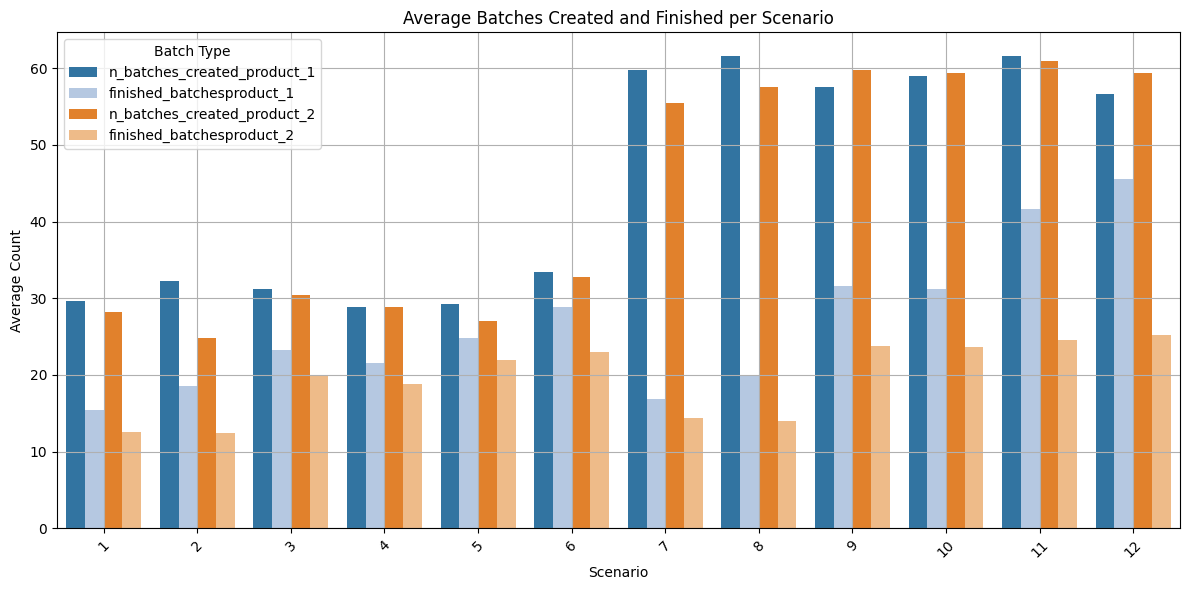

In [19]:
# Step 1: Calculate the Means
mean_batches = df_results.groupby('scenario').agg({
    'n_batches_created_product_1': 'mean',
    'finished_batchesproduct_1': 'mean',
    'n_batches_created_product_2': 'mean',
    'finished_batchesproduct_2': 'mean'
}).reset_index()

# Step 2: Reshape the Data for Plotting
mean_batches_melted = mean_batches.melt(id_vars='scenario', 
                                          value_vars=['n_batches_created_product_1', 'finished_batchesproduct_1', 
                                                      'n_batches_created_product_2', 'finished_batchesproduct_2'],
                                          var_name='Batch Type', 
                                          value_name='Count')

# Step 3: Create the Bar Chart with Custom Colors
plt.figure(figsize=(12, 6))

# Define a custom color palette
palette = {
    'n_batches_created_product_1': '#1f77b4',  # Blue for created Product 1
    'finished_batchesproduct_1': '#aec7e8',     # Light blue for finished Product 1
    'n_batches_created_product_2': '#ff7f0e',   # Orange for created Product 2
    'finished_batchesproduct_2': '#ffbb78'       # Light orange for finished Product 2
}

# Create the bar plot
sns.barplot(data=mean_batches_melted, x='scenario', y='Count', hue='Batch Type', palette=palette)

# Title and labels
plt.title('Average Batches Created and Finished per Scenario')
plt.xlabel('Scenario')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(title='Batch Type')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()